# **Logistic Regression**

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

pd.pandas.set_option("display.max.columns", None)

In [72]:
df = sns.load_dataset("iris")

In [73]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [79]:
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [83]:
X = df.iloc[:, :-1] # independent features
y = df.iloc[:, -1] # dependent features

In [35]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# **Eliminating the label 'virginica' for binary classification**

In [81]:
df = df[df['species'] != 0]

In [85]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
logistic = LogisticRegression()
parameter = {'C': [0.0000000000000005, 0.5, 1, 5, 7, 10, 20, 35, 40], 'penalty': ['l2']}
logistic_regressor = GridSearchCV(logistic, parameter, cv=5, scoring='accuracy')
logistic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [5e-16, 0.5, 1, 5, 7, 10, 20, 35, 40],
                         'penalty': ['l2']},
             scoring='accuracy')

In [87]:
logistic_regressor.best_score_

np.float64(0.9875)

# **Prediction**

In [88]:
y_hat = logistic_regressor.predict(X_test)

<Axes: >

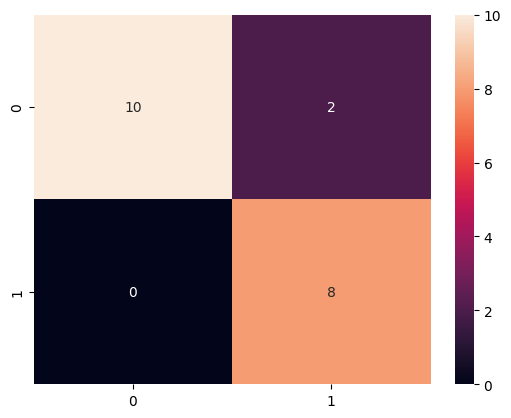

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score, f1_score
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)

In [90]:
f1_score(y_test, y_hat, average='weighted')

0.901010101010101